In [1]:
df <- read.csv("sampled_job_descriptions.csv", sep=",", header=TRUE, fill=TRUE)

In [2]:
library(readr)
library(dplyr)

Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
# Check for missing values
missing_values <- sum(is.na(df$Experience))
print(paste("Number of missing values in Experience column:", missing_values))

# Check for non-numeric values
non_numeric_values <- unique(df$Experience[!is.na(df$Experience) & !is.numeric(df$Experience)])
print("Non-numeric values in Experience column:")
print(non_numeric_values)

[1] "Number of missing values in Experience column: 0"
[1] "Non-numeric values in Experience column:"


 [1] "4 to 11 Years" "3 to 10 Years" "0 to 15 Years" "2 to 12 Years"
 [5] "2 to 9 Years"  "4 to 9 Years"  "2 to 11 Years" "5 to 14 Years"
 [9] "2 to 15 Years" "3 to 12 Years" "0 to 9 Years"  "4 to 8 Years" 
[13] "1 to 10 Years" "5 to 10 Years" "3 to 15 Years" "4 to 10 Years"
[17] "3 to 11 Years" "1 to 8 Years"  "1 to 15 Years" "0 to 14 Years"
[21] "3 to 14 Years" "0 to 8 Years"  "4 to 12 Years" "3 to 9 Years" 
[25] "3 to 8 Years"  "2 to 13 Years" "0 to 13 Years" "5 to 9 Years" 
[29] "2 to 14 Years" "5 to 15 Years" "1 to 14 Years" "2 to 8 Years" 
[33] "5 to 11 Years" "3 to 13 Years" "2 to 10 Years" "1 to 9 Years" 
[37] "0 to 12 Years" "5 to 8 Years"  "1 to 12 Years" "1 to 13 Years"
[41] "1 to 11 Years" "4 to 14 Years" "5 to 12 Years" "5 to 13 Years"
[45] "0 to 11 Years" "4 to 13 Years" "4 to 15 Years" "0 to 10 Years"


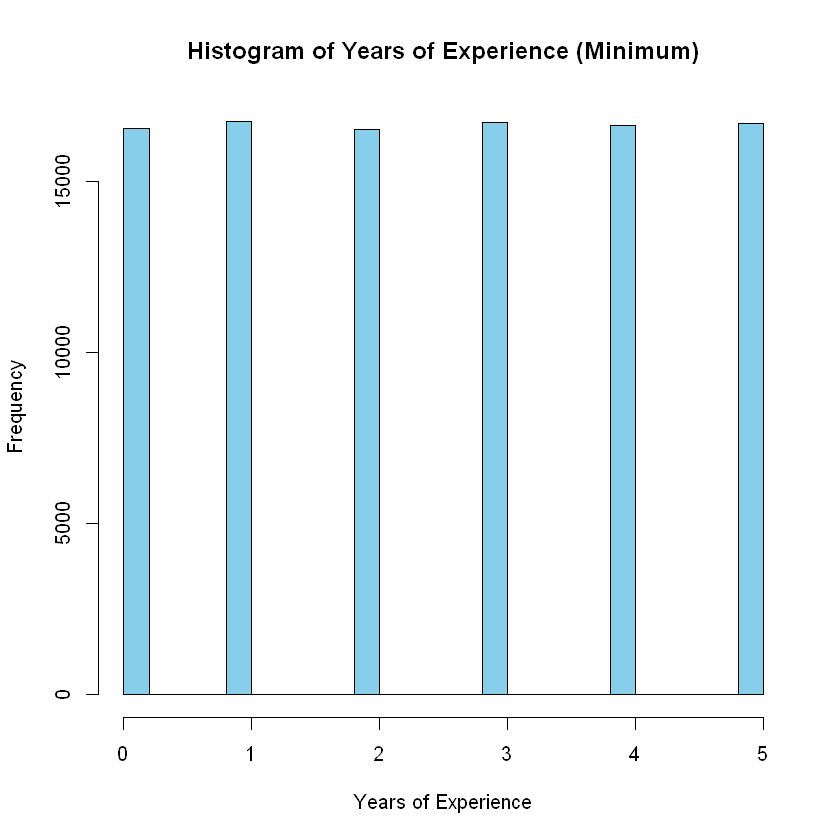

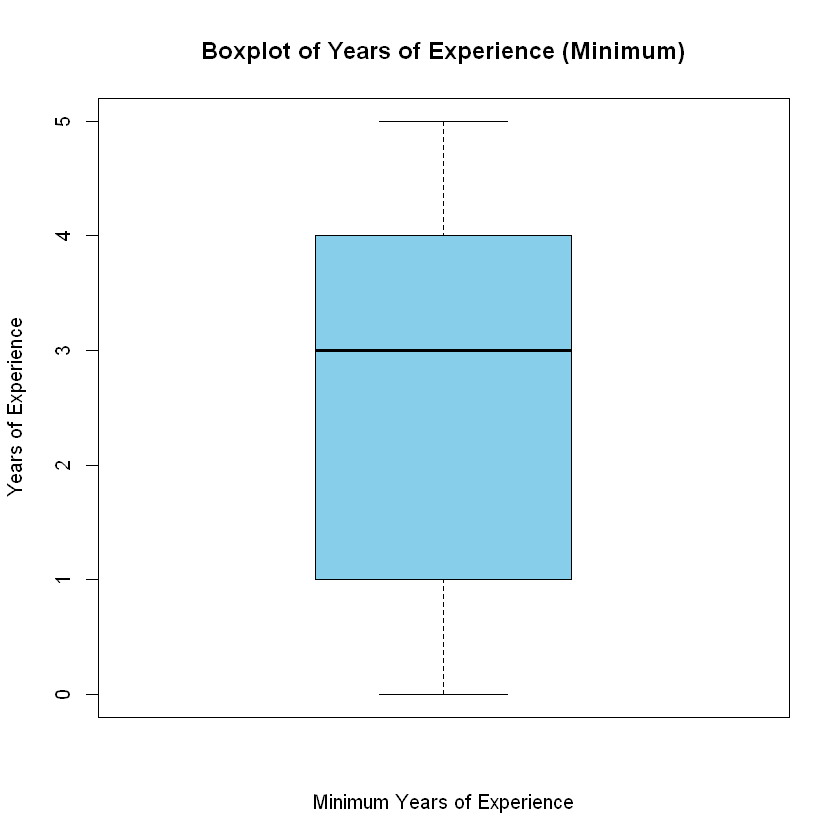

In [4]:
# Extract numeric values from the "Experience" column
df$Experience <- as.character(df$Experience)
experience_range <- strsplit(df$Experience, " to ", fixed = TRUE)
df$minExperience <- as.numeric(sapply(experience_range, `[`, 1))
df$maxExperience <- as.numeric(sapply(experience_range, `[`, 3))

# Plot the histogram of the minimum experience values
hist(df$minExperience, 
     breaks = 20,          # Number of bins
     col = "skyblue",      # Color of bars
     xlab = "Years of Experience",  # X-axis label
     ylab = "Frequency",   # Y-axis label
     main = "Histogram of Years of Experience (Minimum)"  # Title of the plot
)

# Boxplot of minimum experience values
boxplot(df$minExperience,
        col = "skyblue",
        main = "Boxplot of Years of Experience (Minimum)",
        xlab = "Minimum Years of Experience",
        ylab = "Years of Experience"
)

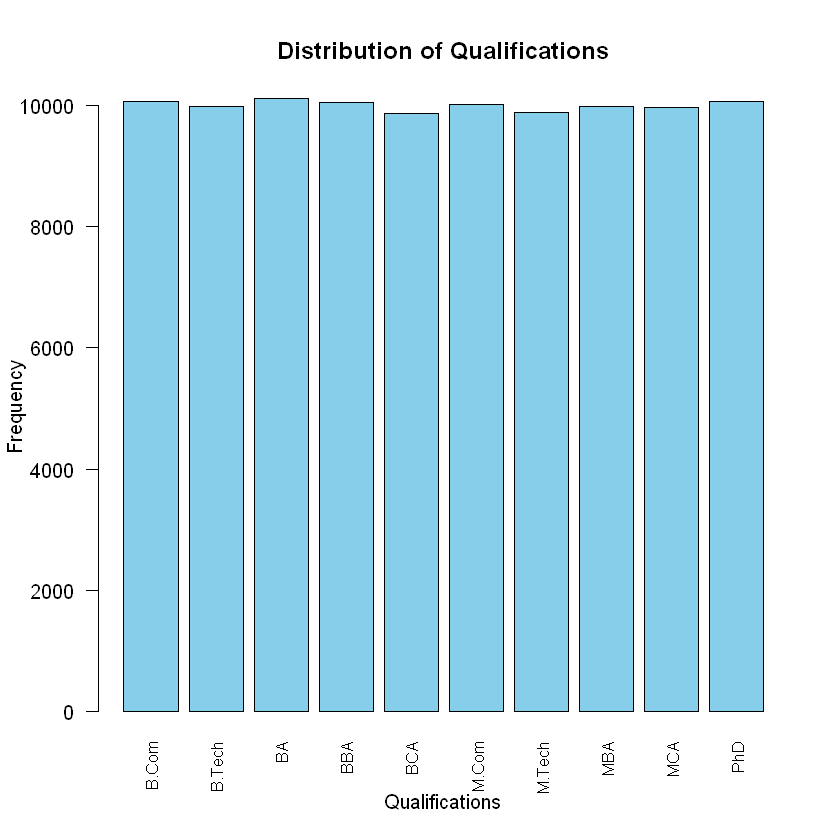

In [5]:
# Plot the histogram of qualifications
barplot(table(df$Qualifications), 
        col = "skyblue", 
        main = "Distribution of Qualifications",
        xlab = "Qualifications",
        ylab = "Frequency",
        cex.name = 0.8,
        las = 2)

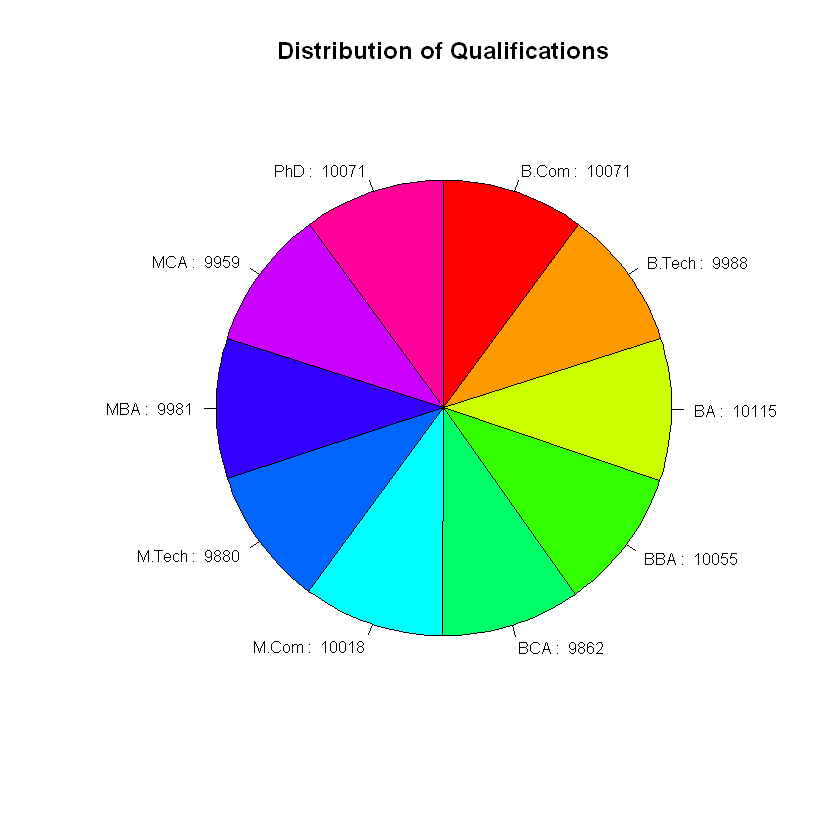

In [6]:
# Create a table of qualification frequencies
qualification_freq <- table(df$Qualifications)

# Plot a pie chart
pie(qualification_freq,
    main = "Distribution of Qualifications",
    col = rainbow(length(qualification_freq)), # Set colors for the pie slices
    labels = paste(names(qualification_freq), ": ", qualification_freq), # Include labels with frequencies
    cex = 0.8, # Adjust label size
    clockwise = TRUE # Order of the slices
)

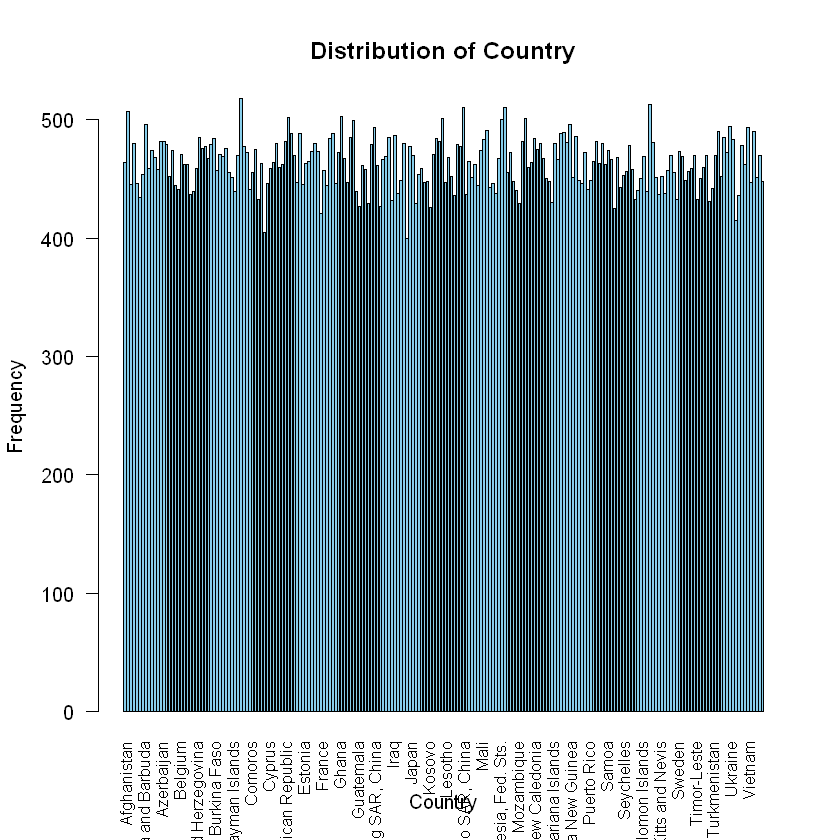

In [7]:
# Plot the histogram of Country
barplot(table(df$Country), 
        col = "skyblue", 
        main = "Distribution of Country",
        xlab = "Country",
        ylab = "Frequency",
        cex.name = 0.8,
        las = 2)

In [8]:
install.packages("treemap")

Installing package into 'C:/Users/pooh_/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



also installing the dependencies 'gridBase', 'igraph'




package 'gridBase' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'treemap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pooh_\AppData\Local\Temp\RtmpY5tfSt\downloaded_packages


Warning message:
"package 'treemap' was built under R version 4.3.3"


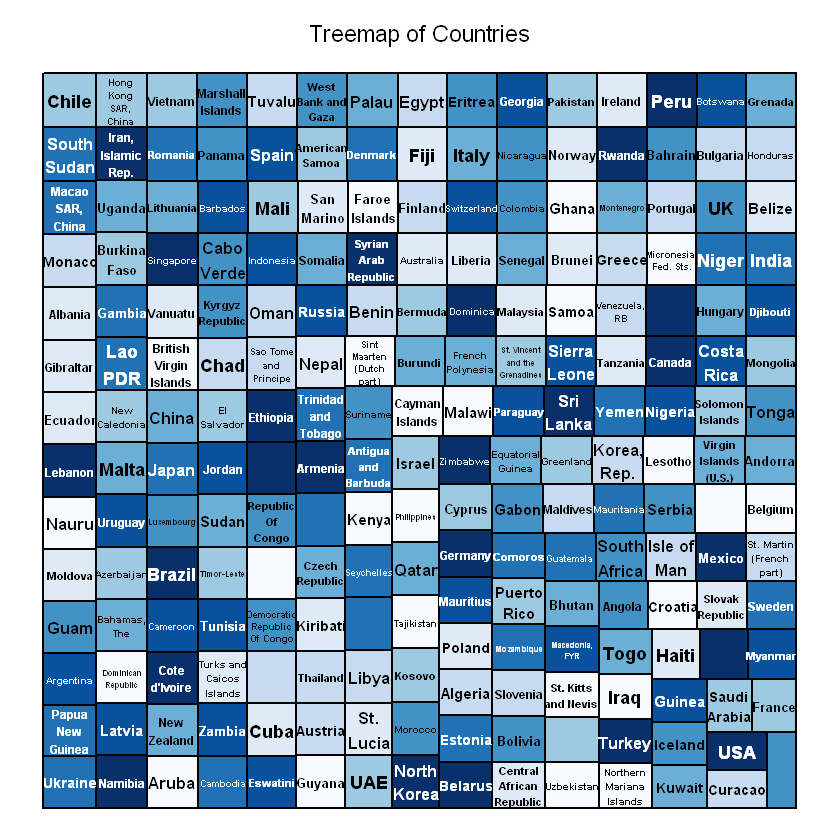

In [9]:
# Create a table of country frequencies
country_freq <- table(df$Country)

# Convert the table to a data frame
df_country <- as.data.frame(country_freq)

# Rename the columns
names(df_country) <- c("Country", "Freq")

# Load the treemap package
library(treemap)

# Create a treemap
treemap(df_country,
        index = "Country",
        vSize = "Freq",
        title = "Treemap of Countries",
        palette = "Blues",
        fontsize.title = 14
)

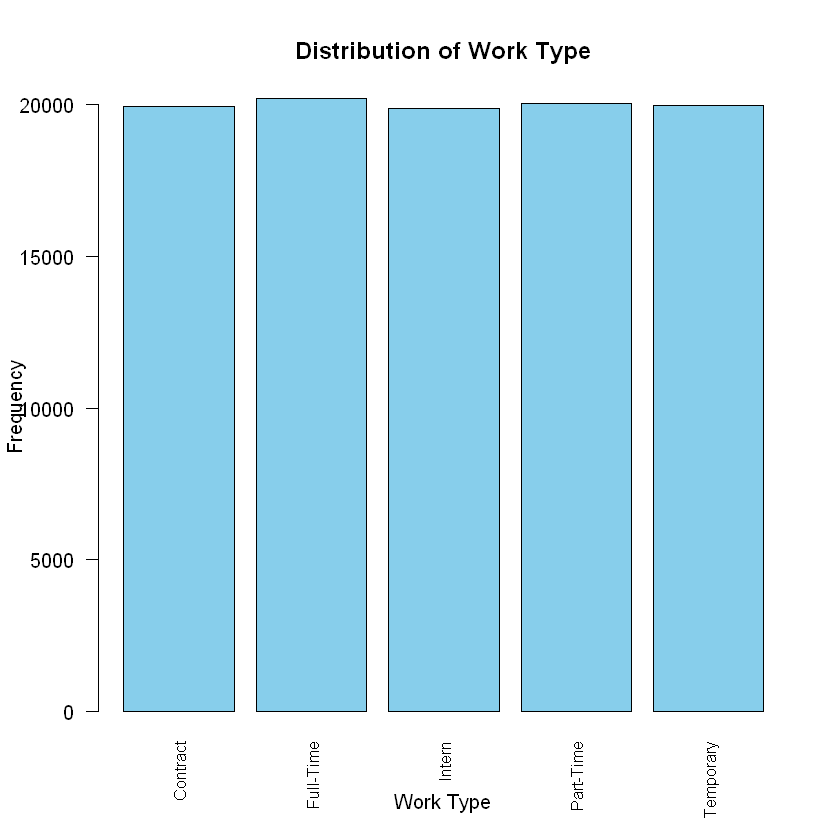

In [10]:
# Plot the histogram of Work Type
barplot(table(df$Work.Type), 
        col = "skyblue", 
        main = "Distribution of Work Type",
        xlab = "Work Type",
        ylab = "Frequency",
        cex.name = 0.8,
        las = 2)

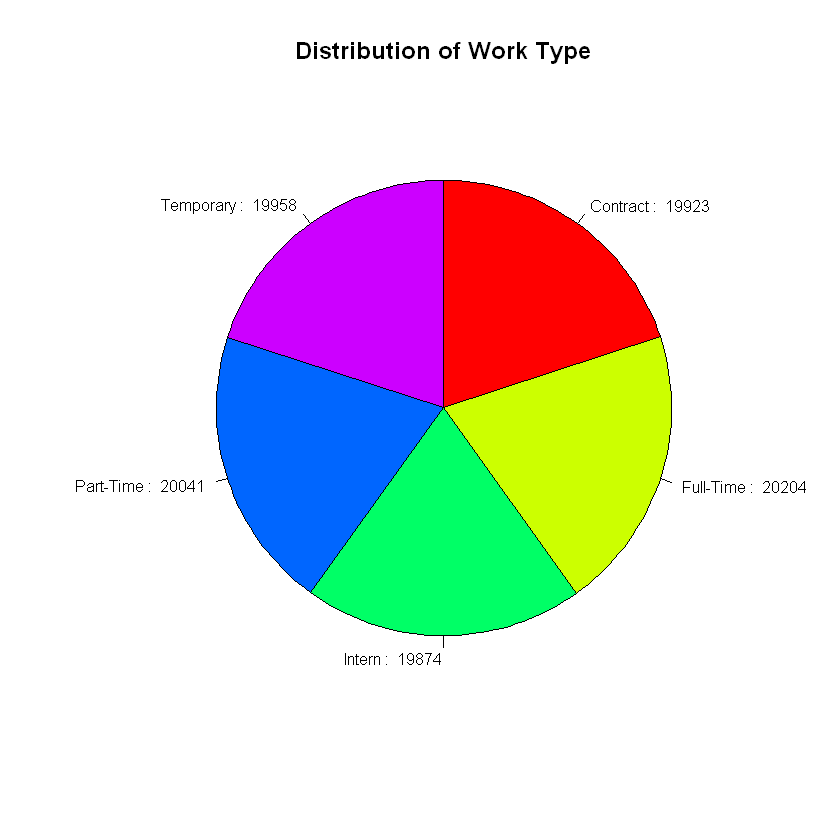

In [11]:
# Create a table of work type frequencies
work_type_freq <- table(df$Work.Type)

# Plot a pie chart
pie(work_type_freq,
    main = "Distribution of Work Type",
    col = rainbow(length(work_type_freq)), # Set colors for the pie slices
    labels = paste(names(work_type_freq), ": ", work_type_freq), # Include labels with frequencies
    cex = 0.8, # Adjust label size
    clockwise = TRUE # Order of the slices
)

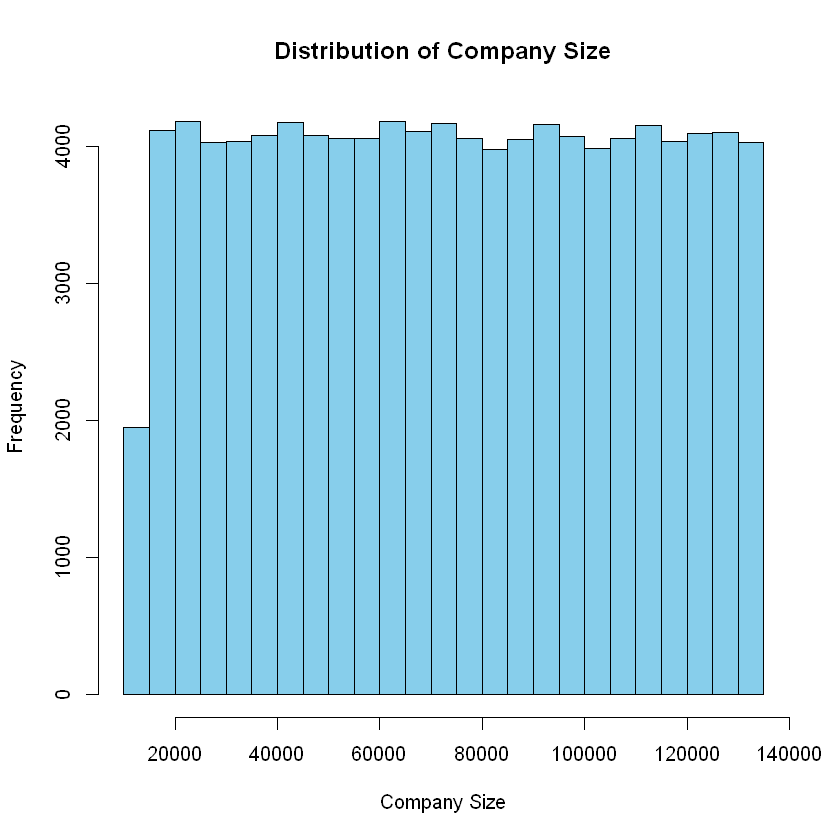

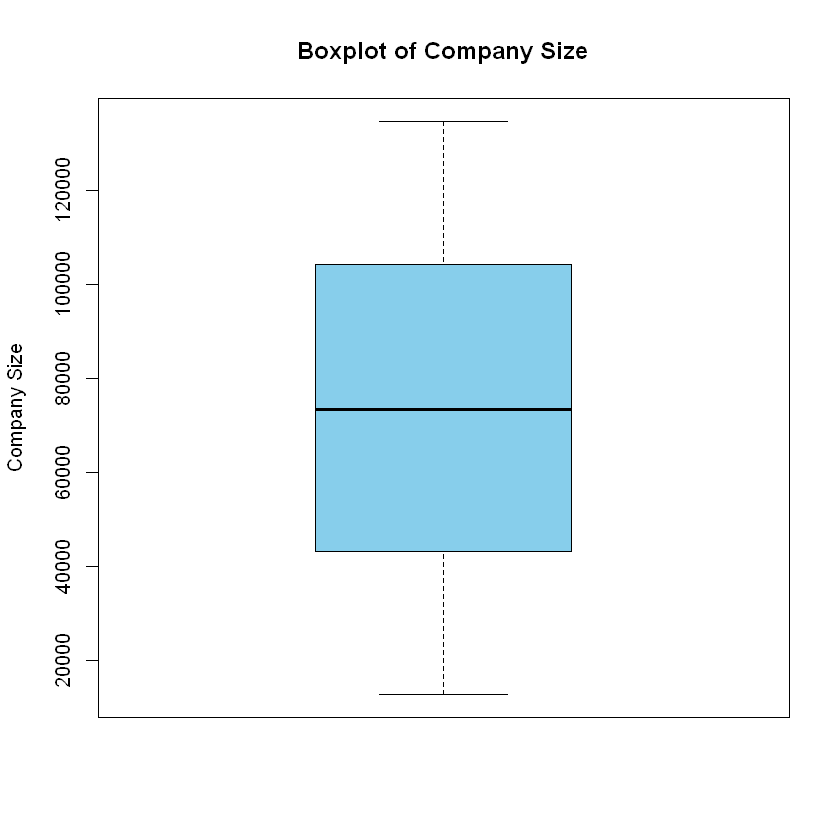

In [12]:
# Example histogram distribution for numerical data (Company Size)
hist(df$Company.Size, 
     col = "skyblue",          # Color of bars
     main = "Distribution of Company Size",  # Title of the plot
     xlab = "Company Size",    # X-axis label
     ylab = "Frequency"        # Y-axis label
)

# Boxplot of Company Size
boxplot(df$Company.Size,
        col = "skyblue",         # Color of the boxplot
        main = "Boxplot of Company Size",    # Title of the plot
        ylab = "Company Size"    # Y-axis label
)


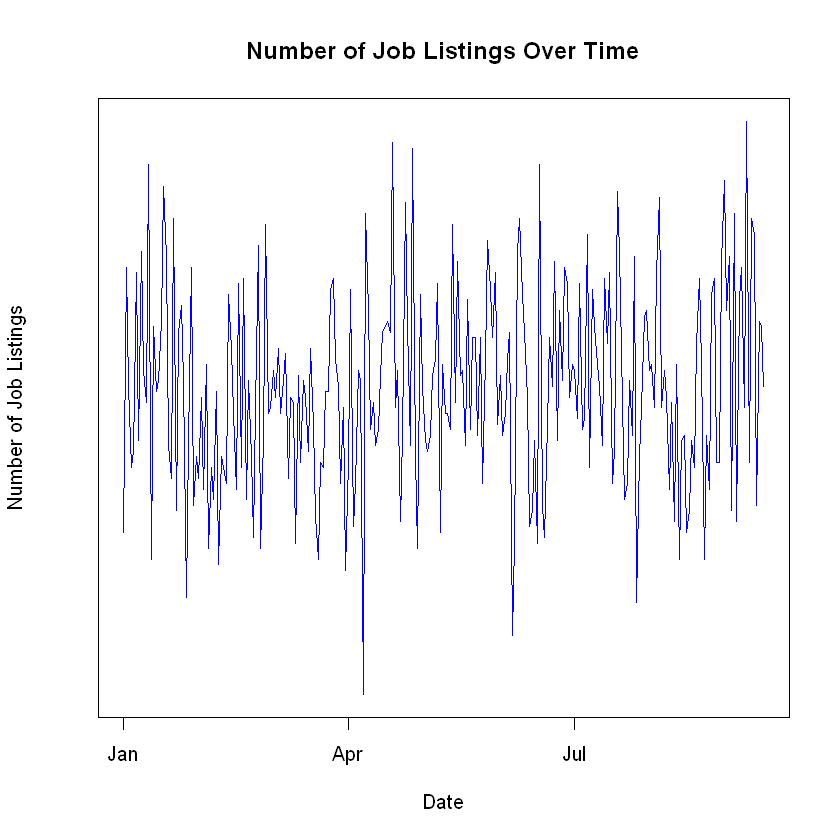

In [13]:
# Aggregate job listings by date
job_listing_counts <- table(df$Job.Posting.Date)

# Plot time series
plot(as.Date(names(job_listing_counts)), job_listing_counts, 
     type = "l", # use lines
     col = "blue",
     xlab = "Date",
     ylab = "Number of Job Listings",
     main = "Number of Job Listings Over Time"
)

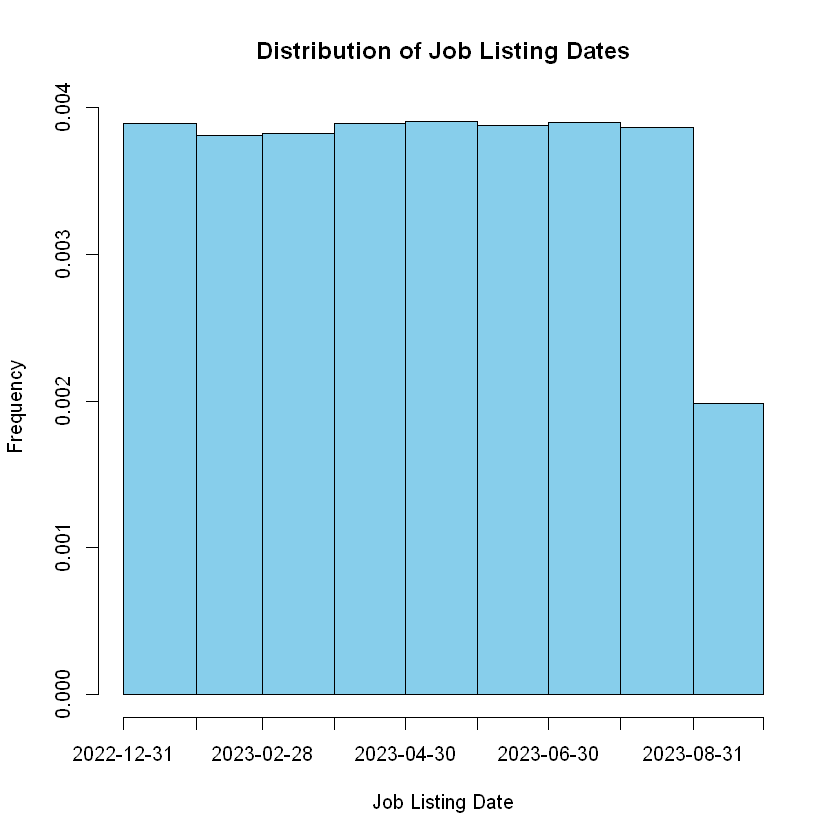

In [14]:
# Convert Job.Posting.Date to Date format
df$Job.Posting.Date <- as.Date(df$Job.Posting.Date)

# Plot histogram
hist(df$Job.Posting.Date, 
     main = "Distribution of Job Listing Dates",
     xlab = "Job Listing Date",
     ylab = "Frequency",
     col = "skyblue",
     breaks = "months" # bin by month
)


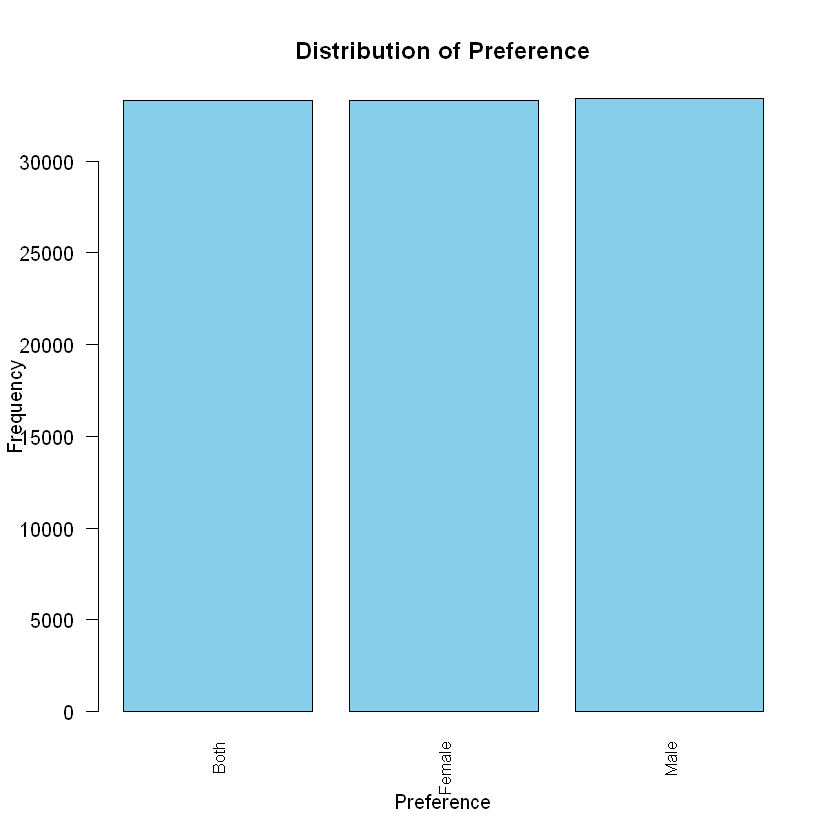

In [15]:
# Plot the histogram of Preferences
barplot(table(df$Preference), 
        col = "skyblue", 
        main = "Distribution of Preference",
        xlab = "Preference",
        ylab = "Frequency",
        cex.name = 0.8,
        las = 2)

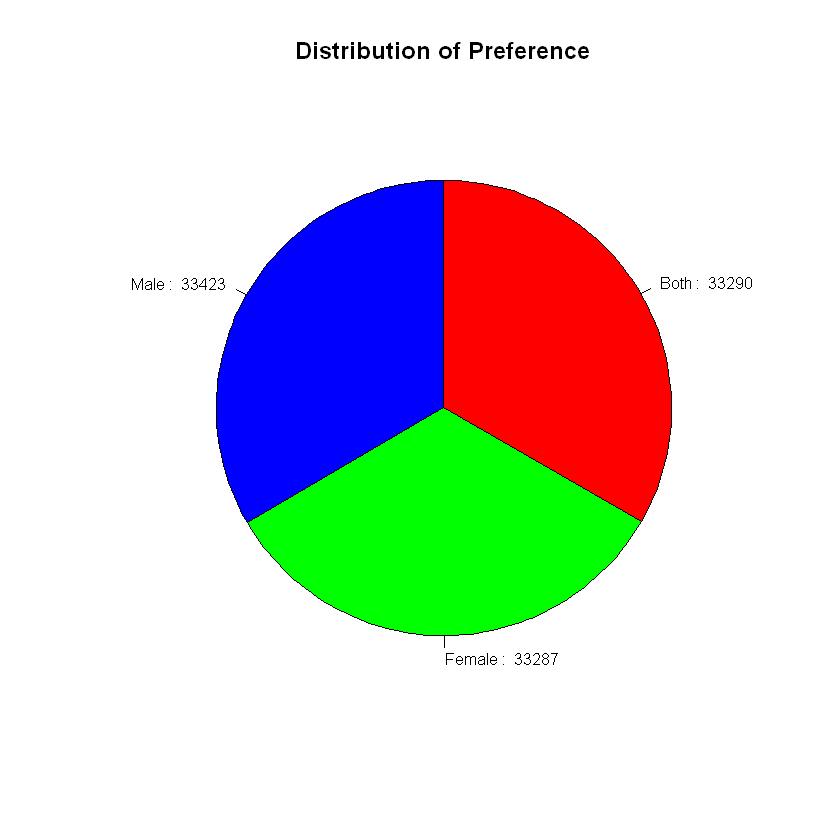

In [16]:
# Create a pie chart for the distribution of preferences
preference_counts <- table(df$Preference)
pie(preference_counts,
    main = "Distribution of Preference",
    col = rainbow(length(preference_counts)),  # Color of the slices
    labels = paste(names(preference_counts), ": ", preference_counts),  # Labels with counts
    cex = 0.8,  # Adjust label font size
    clockwise = TRUE  # Order of slices
)

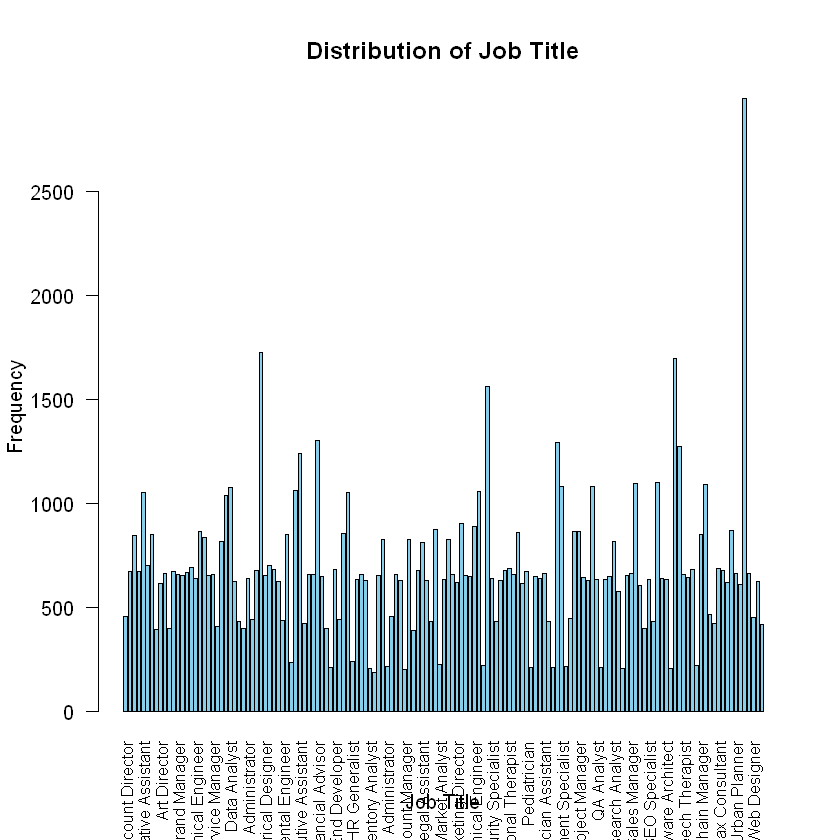

In [17]:
# Plot the histogram of Job Title
barplot(table(df$Job.Title), 
        col = "skyblue", 
        main = "Distribution of Job Title",
        xlab = "Job Title",
        ylab = "Frequency",
        cex.name = 0.8,
        las = 2)

In [18]:
# Example data
data <- data.frame(Salary.Range = c("$12K-$128K", "$40K-$90K", "$80K-$150K"))

# Function to extract numeric values
extract_numeric <- function(x) {
  # Extract numeric part and remove non-numeric characters
  numeric_part <- gsub("\\D", "", x)
  # Convert to numeric (handling empty strings)
  ifelse(numeric_part == "", NA, as.numeric(numeric_part))
}

# Split the "Salary.Range" column by "-"
data <- data %>%
  mutate(Salary.Range = strsplit(Salary.Range, "-")) %>%
  # Extract minimum and maximum values
  mutate(
    minRange = extract_numeric(sapply(Salary.Range, `[`, 1)) * 1000,
    maxRange = extract_numeric(sapply(Salary.Range, `[`, 2)) * 1000
  )

# Print the modified data frame
print(data)

  Salary.Range minRange maxRange
1  $12K, $128K    12000   128000
2   $40K, $90K    40000    90000
3  $80K, $150K    80000   150000


In [19]:
# Function to extract numeric values
extract_numeric <- function(x) {
  # Extract numeric part and remove non-numeric characters
  numeric_part <- gsub("\\D", "", x)
  # Convert to numeric (handling empty strings)
  ifelse(numeric_part == "", NA, as.numeric(numeric_part))
}

# Split the "Salary.Range" column by "-"
df_new <- df %>%
  mutate(Salary.Range = strsplit(as.character(Salary.Range), "-")) %>%
  # Extract minimum and maximum values
  mutate(
    minRange = extract_numeric(sapply(Salary.Range, `[`, 1)) * 1000,
    maxRange = extract_numeric(sapply(Salary.Range, `[`, 2)) * 1000
  )

# Print the modified data frame
print(head(df_new, 5))

     Experience Qualifications Salary.Range          Country Work.Type
1 4 to 11 Years          M.Com  $61K, $128K   Macedonia, FYR Temporary
2 3 to 10 Years         M.Tech  $65K, $129K        Greenland    Intern
3 0 to 15 Years         M.Tech  $56K, $114K         Kiribati Full-Time
4 2 to 12 Years            PhD  $57K, $113K Papua New Guinea    Intern
5  2 to 9 Years          B.Com  $57K, $110K          Georgia Temporary
  Company.Size Job.Posting.Date Preference           Job.Title
1        90997       2023-02-08     Female  Landscape Designer
2       123218       2023-05-10     Female Structural Engineer
3        62356       2023-04-11       Male  Physical Therapist
4        61041       2023-07-13       Both           Architect
5        84565       2023-08-10       Both      Office Manager
                              Role   Job.Portal
1 Sustainable Landscape Specialist ZipRecruiter
2            Construction Engineer     FlexJobs
3     Geriatric Physical Therapist  SimplyHired
4   

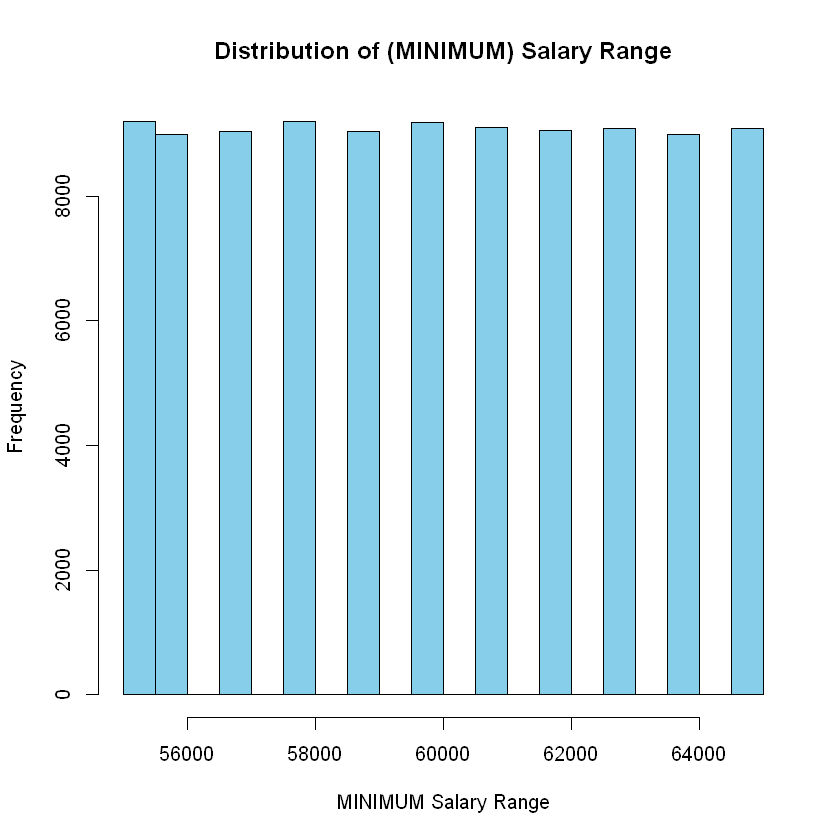

In [20]:
# Example: Histogram of MINIMUM salary range
hist(df_new$minRange, 
     col = "skyblue", 
     main = "Distribution of (MINIMUM) Salary Range", 
     xlab = "MINIMUM Salary Range", 
     ylab = "Frequency"
)

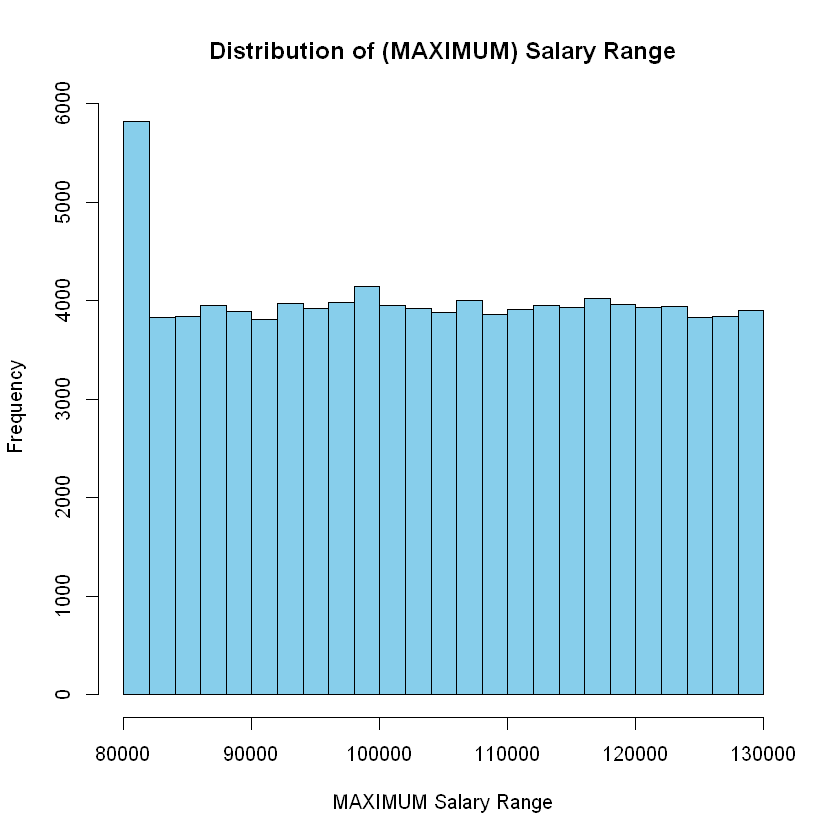

In [21]:
# Example: Histogram of MINIMUM salary range
hist(df_new$maxRange, 
     col = "skyblue", 
     main = "Distribution of (MAXIMUM) Salary Range", 
     xlab = "MAXIMUM Salary Range", 
     ylab = "Frequency"
)

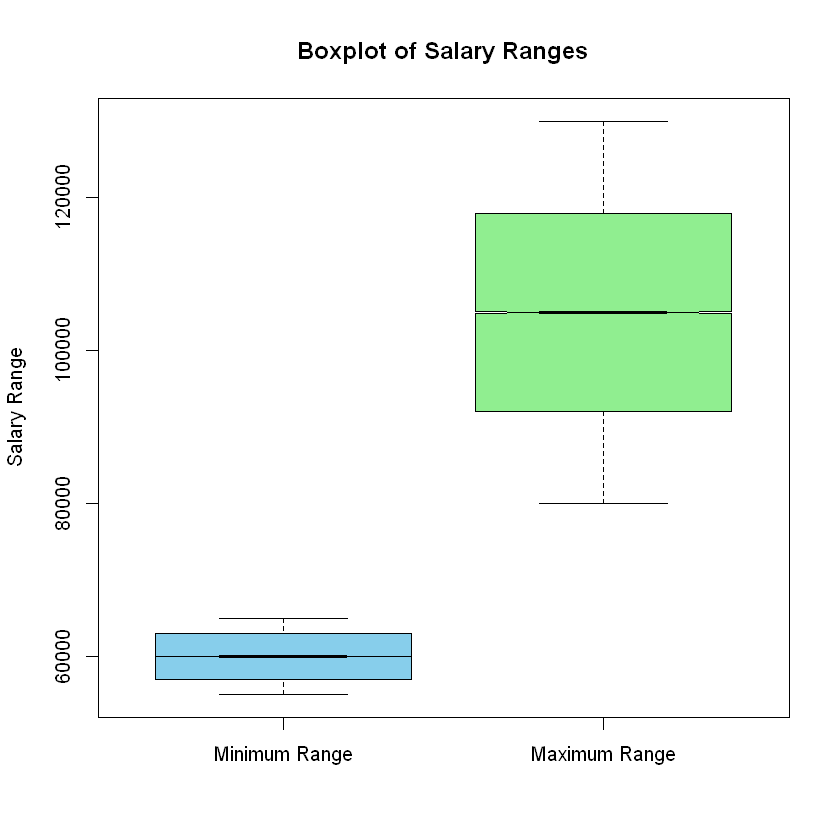

In [22]:
# Boxplot of salary ranges
boxplot(df_new$minRange, df_new$maxRange,
        col = c("skyblue", "lightgreen"),
        names = c("Minimum Range", "Maximum Range"),
        main = "Boxplot of Salary Ranges",
        ylab = "Salary Range",
        notch = TRUE
)

In [23]:
head(df_new, 5)

,Experience,Qualifications,Salary.Range,Country,Work.Type,Company.Size,Job.Posting.Date,Preference,Job.Title,Role,Job.Portal,Benefits,skills,Company.Profile,minExperience,maxExperience,minRange,maxRange
,<chr>,<chr>,<list>,<chr>,<chr>,<int>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,4 to 11 Years,M.Com,"$61K , $128K","Macedonia, FYR",Temporary,90997,2023-02-08,Female,Landscape Designer,Sustainable Landscape Specialist,ZipRecruiter,"{'Transportation Benefits, Professional Development, Bonuses and Incentive Programs, Profit-Sharing, Employee Discounts'}",Sustainable landscape design Native plant selection Water conservation Soil health Green building practices LEED certification,"{""Sector"":""Oil & Gas"",""Industry"":""Oil and Gas"",""City"":""London"",""State"":""N/A"",""Zip"":""N/A"",""Website"":""www.bp.com"",""Ticker"":""BP"",""CEO"":""Bernard Looney""}",4,NA,61000,128000
2,3 to 10 Years,M.Tech,"$65K , $129K",Greenland,Intern,123218,2023-05-10,Female,Structural Engineer,Construction Engineer,FlexJobs,"{'Health Insurance, Retirement Plans, Flexible Work Arrangements, Employee Assistance Programs (EAP), Bonuses and Incentive Programs'}",Construction management Structural design AutoCAD proficiency Project management Site inspection,"{""Sector"":""Utilities"",""Industry"":""Utilities: Gas and Electric"",""City"":""King of Prussia"",""State"":""Pennsylvania"",""Zip"":""19406"",""Website"":""www.ugicorp.com"",""Ticker"":""UGI"",""CEO"":""Roger Perreault""}",3,NA,65000,129000
3,0 to 15 Years,M.Tech,"$56K , $114K",Kiribati,Full-Time,62356,2023-04-11,Male,Physical Therapist,Geriatric Physical Therapist,SimplyHired,"{'Casual Dress Code, Social and Recreational Activities, Employee Referral Programs, Health and Wellness Facilities, Life and Disability Insurance'}",Geriatric rehabilitation Fall prevention Elderly patient care,"{""Sector"":""Aerospace and Defense"",""Industry"":""Aerospace & Defense"",""City"":""Reston"",""State"":""Virginia"",""Zip"":""20190"",""Website"":""www.gd.com"",""Ticker"":""GD"",""CEO"":""Phebe N. Novakovic""}",0,NA,56000,114000
4,2 to 12 Years,PhD,"$57K , $113K",Papua New Guinea,Intern,61041,2023-07-13,Both,Architect,Sustainable Design Specialist,Jobs2Careers,"{'Life and Disability Insurance, Stock Options or Equity Grants, Employee Recognition Programs, Health Insurance, Social and Recreational Activities'}",Sustainable design principles Energy efficiency LEED certification Green building materials Environmental impact assessment,"{""Sector"":""Automotive"",""Industry"":""Automotive Retailing, Services"",""City"":""Medford"",""State"":""Oregon"",""Zip"":""97501"",""Website"":""www.lithiadriveway.com"",""Ticker"":""LAD"",""CEO"":""Bryan B. Deboer""}",2,NA,57000,113000
5,2 to 9 Years,B.Com,"$57K , $110K",Georgia,Temporary,84565,2023-08-10,Both,Office Manager,Office Coordinator,Idealist,"{'Childcare Assistance, Paid Time Off (PTO), Relocation Assistance, Flexible Work Arrangements, Professional Development'}",Office administration Calendar management Reception duties Communication skills Record keeping Office supplies management,"{""Sector"":""Retail"",""Industry"":""Automotive Retailing, Services"",""City"":""Richmond"",""State"":""Virginia"",""Zip"":""23238"",""Website"":""www.carmax.com"",""Ticker"":""KMX"",""CEO"":""William D. Nash""}",2,NA,57000,110000


In [24]:
# List column names
column_names <- colnames(df)

# Print the column names
print(column_names)

 [1] "Experience"       "Qualifications"   "Salary.Range"     "Country"         
 [5] "Work.Type"        "Company.Size"     "Job.Posting.Date" "Preference"      
 [9] "Job.Title"        "Role"             "Job.Portal"       "Benefits"        
[13] "skills"           "Company.Profile"  "minExperience"    "maxExperience"   


In [25]:
# List column names
column_names2 <- colnames(df_new)

# Print the column names
print(column_names2)

 [1] "Experience"       "Qualifications"   "Salary.Range"     "Country"         
 [5] "Work.Type"        "Company.Size"     "Job.Posting.Date" "Preference"      
 [9] "Job.Title"        "Role"             "Job.Portal"       "Benefits"        
[13] "skills"           "Company.Profile"  "minExperience"    "maxExperience"   
[17] "minRange"         "maxRange"        


In [26]:
# Now, view the top 5 rows of the "minRange" and "maxRange" columns
min_max <- df_new[, c("minRange", "maxRange")]
print(head(min_max, 5))

  minRange maxRange
1    61000   128000
2    65000   129000
3    56000   114000
4    57000   113000
5    57000   110000


In [27]:
dim(df)

[1] 100000     16

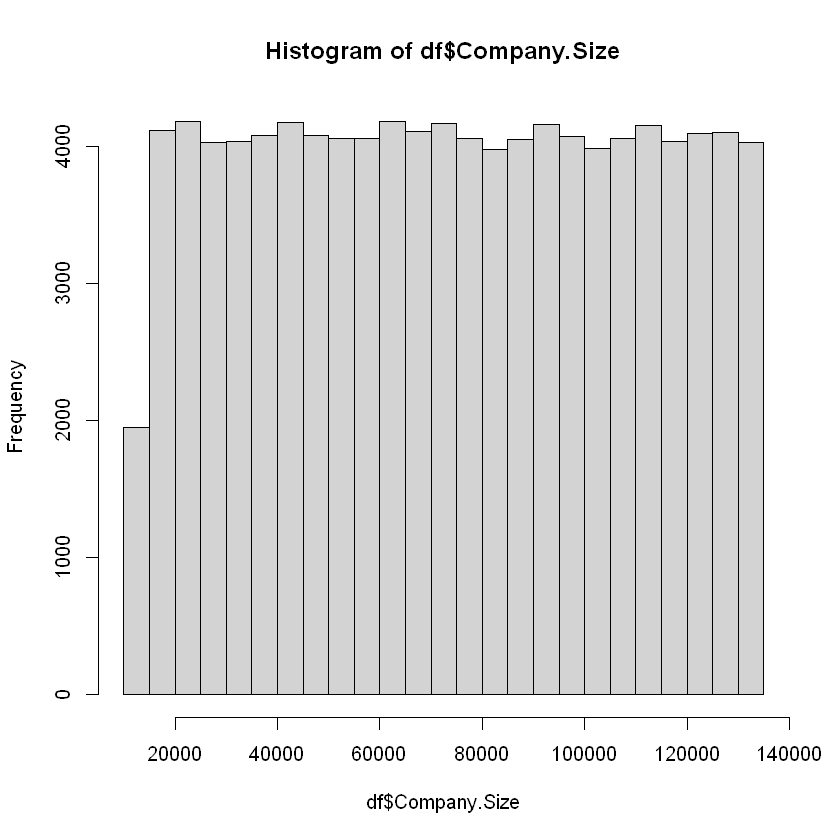

In [28]:
hist(df$Company.Size)

In [29]:
df['Job.Posting.Date']

Job.Posting.Date
<date>
2023-02-08
2023-05-10
2023-04-11
2023-07-13
2023-08-10
2023-01-19
2023-06-09
2023-05-10
2023-02-14


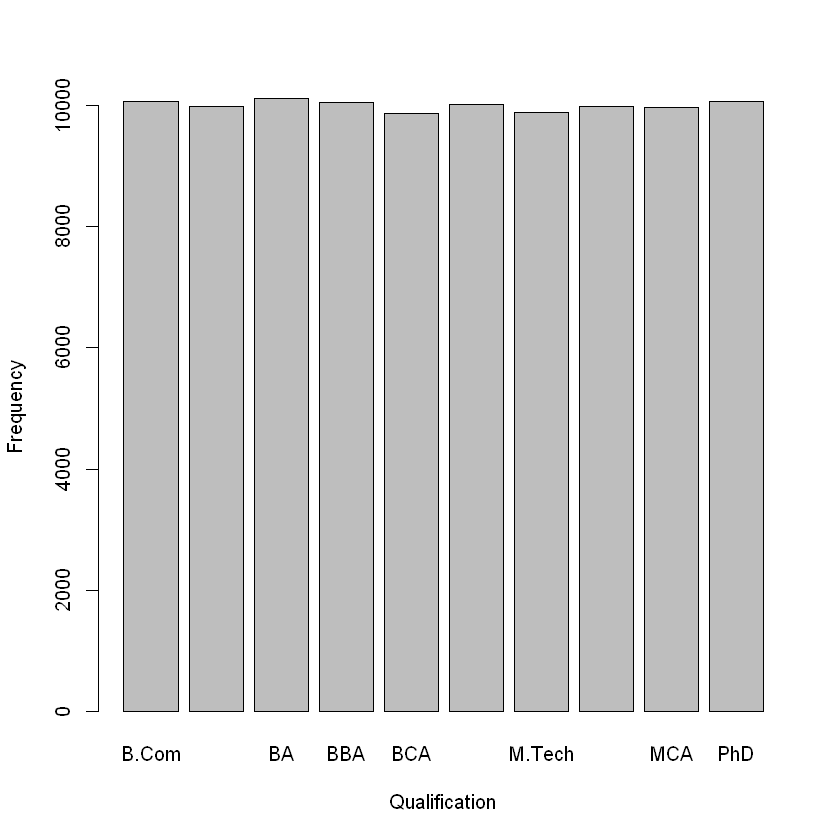

In [30]:
barplot(table(df$Qualifications), ylab="Frequency", xlab="Qualification")

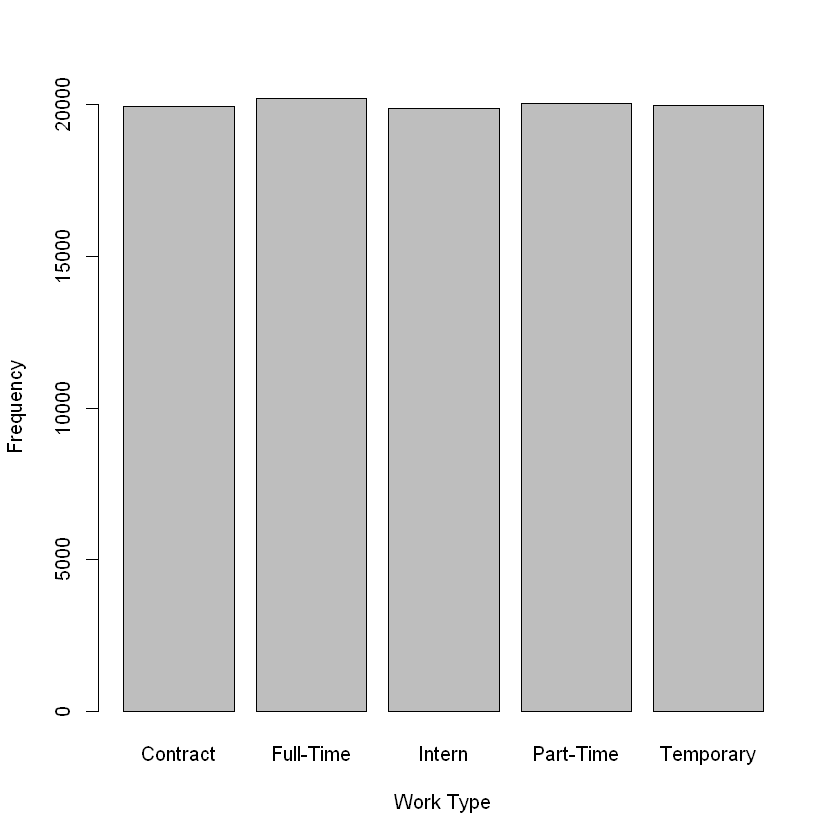

In [31]:
barplot(table(df$Work.Type), ylab="Frequency", xlab="Work Type")